# Introduction to python for hydrologists &mdash; NumPy

This notebook demonstrates how to import and use the Numpy module to work with arrays. The NumPy library includes (among other things) ways of storing and manipulating data that are more efficient than standard Python arrays. Using NumPy with numerical data is much faster than using Python lists or tuples.

### References
[Numpy documentation](https://docs.scipy.org/doc/)  
The [Scipy lecture notes](http://scipy-lectures.org/intro/numpy/index.html) provide a pretty comprehensive demo of the core features of numpy.



### Outline
* Loading Numpy
* Creating a Numpy Array
* Array Operations
* Accessing Array Elements
* Reshaping and Stacking Arrays
* Record Arrays


In [104]:
import os
import matplotlib.pyplot as plt

#this line sets up the directory paths that we will be using
datapath = os.path.join('.', 'data')
print('Data will be loaded from the following directory: ', datapath)

Data will be loaded from the following directory:  ./data


## Loading Numpy
The first step is to load the numpy module.  The common approach for loading numpy is to rename it as "np" as part of the import statement as follows.

Note that at any time, you can enter the name of an object or method and the "?" to see help.  Also remember that shift-tab will bring help.

In [105]:
import numpy as np

Many packages, including Numpy, have a `__version__` attribute.  It is a good idea to be aware of what package version you are using.

In [106]:
#To see the version of numpy that was loaded, enter the following command
print('I am running numpy version: ', np.__version__)

I am running numpy version:  2.2.5


## Creating a NumPy Array

There are several way to create a numpy array (called an ndarray). These include:
1. Convert a list or tuple into an array
2. Use a numpy function
3. Read from a file

### Creating a Numpy Array from a List
The following is an example of converting a list into a numpy array using the numpy [array](http://wiki.scipy.org/Numpy_Example_List#array) function.

In [107]:
#create a new list
lst = [1, 3, 5, 7]

#convert the list into a new array
a = np.array(lst)

#print some information about the new array
print('The array is: ', a)
print('The type of an array is: ', type(a))

The array is:  [1 3 5 7]
The type of an array is:  <class 'numpy.ndarray'>


In [108]:
#Note that the following does not work.  Brackets are required so that the input is a list.
#a = np.array(1, 2, 3)

Every array contains additional information that is stored as an attribute as part of the array.  These attributes include the dimension (ndim) and the array shape (shape), for example.

In [109]:
print('The number of dimensions for a: ', a.ndim)

The number of dimensions for a:  1


In [110]:
print('The shape of a: ', a.shape)

The shape of a:  (4,)


In [111]:
print('The type of a: ', a.dtype)

The type of a:  int64


A two-dimension array can be created by providing two lists within brackets to the numpy array function.

In [112]:
#create a new list
lst1 = [1, 3, 5, 7]
lst2 = [9, 12, 14, 32]

#convert the list into a new array
a = np.array([lst1, lst2])

#print some information about the new array
print('The array is: ')
print(a)
print('The type of the array is: ', type(a))
print('The dimension of the array is: ', a.ndim)
print('The shape of the array is: ', a.shape)

The array is: 
[[ 1  3  5  7]
 [ 9 12 14 32]]
The type of the array is:  <class 'numpy.ndarray'>
The dimension of the array is:  2
The shape of the array is:  (2, 4)


We could also skip the step of creating two lists and just put them right into the np.array function as follows.

In [113]:
np.array([[1, 3, 5, 7],[9, 12, 14, 32]])

array([[ 1,  3,  5,  7],
       [ 9, 12, 14, 32]])

## Array Generating Functions

There are many different functions for creating numpy arrays.  They are described [here](http://docs.scipy.org/doc/numpy/reference/routines.array-creation.html).  

Here are a few common array generating functions with links to their descriptions:

* [empty](http://wiki.scipy.org/Numpy_Example_List#empty)
* [zeros](http://wiki.scipy.org/Numpy_Example_List#zeros)
* [ones](http://wiki.scipy.org/Numpy_Example_List#ones)
* [arange](http://wiki.scipy.org/Numpy_Example_List#arange)
* [linspace](http://wiki.scipy.org/Numpy_Example_List#linspace)

empty, zeros, and ones will all create a new array, and they all have the same syntax.  The only difference is the value that will be assigned to all of the array elements upon initialization.  The syntax for creating an empty array is:

    a = np.empty( (shape), dtype )


In [114]:
# Create an empty array
print(np.empty((2,2), dtype=int))

[[1 3]
 [5 7]]


You are probably asking, what is this junk?  When you use `np.empty`, the only guarantee is that none of the values will be initialized.  You'll get whatever garbage was in that memory address.  You will only want to use `np.empty` if you know that you will be filling the array with meaningful values.

The `dtype` is the type of array to create.  Some common examples are int (INTEGER), float (a floating point, or REAL for you FORTRAN people).  Numpy also has some of its own, like np.int, np.float, np.float32, np.float64, etc.

Here is an empty float array.

In [115]:
a = np.empty((3,3), np.float32)
print(a)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


As you might expect, `np.zeros` and `np.ones` make arrays with values initialized one zero and one, respectively.

In [116]:
print(np.ones((3,3,3), int))
print(np.zeros((2,2,2), float))

[[[1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]]]
[[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]


## Input and Output

Numpy has a great set of tools for saving arrays to files and reading arrays from files.  Details on these tools are [here](http://docs.scipy.org/doc/numpy/reference/routines.io.html).

The following are the common ones:

* [loadtxt](http://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html#numpy.loadtxt)
* [savetxt](http://docs.scipy.org/doc/numpy/reference/generated/numpy.savetxt.html#numpy.savetxt)

We will now test these functions using data in the `datapath/04_numpy` directory.  In this folder, there is a file called `mt_st_helens_before.dat`.  This file is a simple text array with a grid of elevations for Mt. St Helens prior to the 1980 eruption.  We can read this array using the `loadtxt` function as follows.

In [117]:
before = np.loadtxt('data/mt_st_helens_before.dat', dtype=np.float32)
print(before.shape, before.dtype)
filename = ''  #this is to prevent you from accidently writing over this file later

(466, 327) float32


We can very quickly plot a two-dimensional numpy array using the imshow function, which is part of matplotlib.  Matplotlib will be covered in a subsequent notebook.

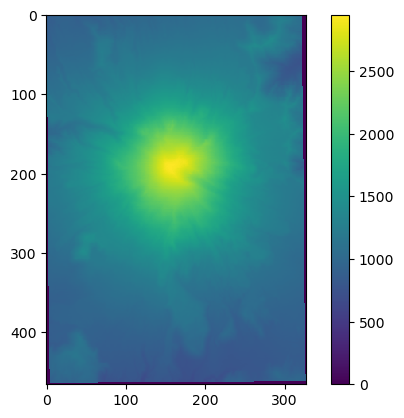

In [118]:
plt.imshow(before, interpolation='nearest')
cb = plt.colorbar()

## Testing your Skills

1. Write the Mt. St. Helens array (before) to a new file called `mynewarray.dat` in the same folder as `mt_st_helens_before.dat`.
2. Take a look at `bottom_commented.dat` in a text editor.  What about this file?  Can you read this file using loadtxt without having to manually change the file?  Hint: look at the loadtxt arguments by either googling it or doing `help(np.loadtxt)` or `?np.loadtxt`

In [119]:
#Skill Test 1


In [120]:
#Skill Test 2


## Array Operations

As you might expect, it is very easy to perform arithmetic operations on arrays.  So we can easily add and subtract arrays and use them in numpy functions.  The following is a couple examples of using simple arithmetic array operations as when as an example for plotting a sin function.

In [121]:
#add
a = np.ones((100, 100))
a = a + 1
print(a)

#powers, division
a = a ** 2.73 / 75
print(a)

[[2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 ...
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]]
[[0.08846075 0.08846075 0.08846075 ... 0.08846075 0.08846075 0.08846075]
 [0.08846075 0.08846075 0.08846075 ... 0.08846075 0.08846075 0.08846075]
 [0.08846075 0.08846075 0.08846075 ... 0.08846075 0.08846075 0.08846075]
 ...
 [0.08846075 0.08846075 0.08846075 ... 0.08846075 0.08846075 0.08846075]
 [0.08846075 0.08846075 0.08846075 ... 0.08846075 0.08846075 0.08846075]
 [0.08846075 0.08846075 0.08846075 ... 0.08846075 0.08846075 0.08846075]]


There is so much you can do with numpy arrays and the available functions.  For a list of the mathematical functions look [here](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

In [122]:
#or how about a sin function
x = np.linspace(0, 2*np.pi)
y = np.sin(x)
print(x, y)

[0.         0.12822827 0.25645654 0.38468481 0.51291309 0.64114136
 0.76936963 0.8975979  1.02582617 1.15405444 1.28228272 1.41051099
 1.53873926 1.66696753 1.7951958  1.92342407 2.05165235 2.17988062
 2.30810889 2.43633716 2.56456543 2.6927937  2.82102197 2.94925025
 3.07747852 3.20570679 3.33393506 3.46216333 3.5903916  3.71861988
 3.84684815 3.97507642 4.10330469 4.23153296 4.35976123 4.48798951
 4.61621778 4.74444605 4.87267432 5.00090259 5.12913086 5.25735913
 5.38558741 5.51381568 5.64204395 5.77027222 5.89850049 6.02672876
 6.15495704 6.28318531] [ 0.00000000e+00  1.27877162e-01  2.53654584e-01  3.75267005e-01
  4.90717552e-01  5.98110530e-01  6.95682551e-01  7.81831482e-01
  8.55142763e-01  9.14412623e-01  9.58667853e-01  9.87181783e-01
  9.99486216e-01  9.95379113e-01  9.74927912e-01  9.38468422e-01
  8.86599306e-01  8.20172255e-01  7.40277997e-01  6.48228395e-01
  5.45534901e-01  4.33883739e-01  3.15108218e-01  1.91158629e-01
  6.40702200e-02 -6.40702200e-02 -1.91158629e-01 -

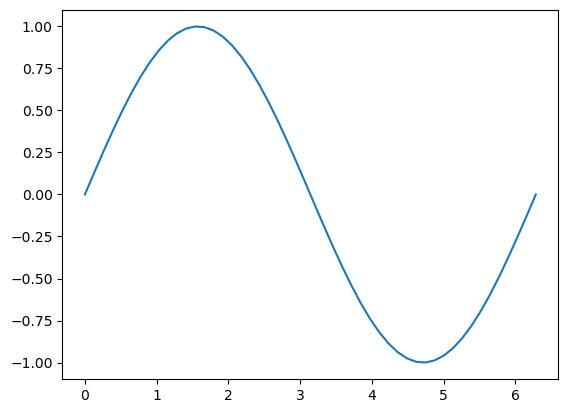

In [123]:
# An x, y plot can be quickly generated using plt.plot()
plt.plot(x, y)

## Accessing Array Elements

Okay, now for the good stuff...

Numpy arrays are zero based, which means the first position is referenced as 0.  If you are a FORTRAN person or a MATLAB person, THIS WILL CAUSE YOU GREAT GRIEF!  You will be burned by the fact that the first element in an array is not `a[1]`.  It is `a[0]`.  You will accept it, eventually, and then you will find zero-based arrays to be more intuitive, maybe.

Let's do some array slicing to see how all of this works.

In [124]:
#create an array with 10 equally spaced values
a = np.linspace(50, 60, 10)
print(a)

[50.         51.11111111 52.22222222 53.33333333 54.44444444 55.55555556
 56.66666667 57.77777778 58.88888889 60.        ]


In [125]:
#we can access the first value as
print('The first value is: ', a[0])

#the last value is
print('The last value is: ', a[6])

The first value is:  50.0
The last value is:  56.666666666666664


Okay, this is all good. Now there is another cool part of numpy arrays, and that is that we can use negative index numbers.  So instead of a[6], we could also say a[-1].

In [126]:
print('The last value is: ', a[-1])

#hmm.  Does that mean?  yup.
print('The second to last value is: ', a[-2])

The last value is:  60.0
The second to last value is:  58.888888888888886


### Accessing Parts of an Array

So how do we access parts of an array?  The formal syntax for a one dimensional array is:

    array[idxstart : idxstop : idxstride]
    
where idxstart is the zero-based array position to start; idxstop is the zero-based index to go up to, BUT NOT INCLUDE, and idxstride is the number of values to skip.  The following are valid array slides:

    a[:]    #all elements
    a[0:-1] #all elements
    a[2:10] #elements in the third position up to elements in the 10th position
    a[::2]  #start in position 0 and include every other element
    a[::-1] #start at the end and reverse the order

The following are some examples.


In [127]:
#make a fresh array with 100 values
a = np.arange(100)
print('a=', a)

#print values from the beginning up to but not including the 10th value
print('a[10]: ', a[:10])

#or print the values from postion 90 to the end
print('a[90:]', a[90:])

a= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
a[10]:  [0 1 2 3 4 5 6 7 8 9]
a[90:] [90 91 92 93 94 95 96 97 98 99]


This is all good, but what if want to skip over values.  Then we can also enter a stride. 

In [128]:
# Print every second value
print(a[::2])

[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46
 48 50 52 54 56 58 60 62 64 66 68 70 72 74 76 78 80 82 84 86 88 90 92 94
 96 98]


In [129]:
# Print every 5th value from 50 to 100
print(a[50::5])

[50 55 60 65 70 75 80 85 90 95]


**Note** the slice notation `50::5` above is actually shorthand for the built-in slice object

In [130]:
a[slice(50, None, 5)]

array([50, 55, 60, 65, 70, 75, 80, 85, 90, 95])

And this all works for multi-dimensional arrays as well.  So we can access parts of a multi-dimensional array.

In [131]:
a = np.ones((10, 10), dtype=int)
print(a)

[[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]


In [132]:
#now lets set the upper left quadrant of a to 2
a[:5, :5] = 2
print(a)

[[2 2 2 2 2 1 1 1 1 1]
 [2 2 2 2 2 1 1 1 1 1]
 [2 2 2 2 2 1 1 1 1 1]
 [2 2 2 2 2 1 1 1 1 1]
 [2 2 2 2 2 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]


### Accessing Array Elements Using an Index List or Array

If we know the array indices that we want to access, we can specify them in a list and pass that list to the array through the brackets.

In [133]:
a = np.random.random(10)
print(a)
print('values in 2, 3, and 7 positions', a[[2, 3, 7]])

[0.89260476 0.28142777 0.99767552 0.67938943 0.9592067  0.01003127
 0.4697843  0.05850454 0.85517045 0.0575799 ]
values in 2, 3, and 7 positions [0.99767552 0.67938943 0.05850454]


In [134]:
#this also works for multi dimensions
icoord = np.arange(10)
jcoord = icoord
a = np.zeros((10, 10), dtype='int')
a[icoord, jcoord] = 1
print(a)  #hey, its the identity matrix!

#what do you think?  Do you think numpy has an identity function?

[[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]


### Boolean indexing
conditional statements can also be used to slice arrays
what if we want to identify nodata in the Mt. St. Helens array, which have a value of 0, and convert them to nodata?

In [135]:
before

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [867., 872., 881., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]],
      shape=(466, 327), dtype=float32)

In [136]:
before[before == 0] = np.nan

In [137]:
before

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [867., 872., 881., ...,  nan,  nan,  nan],
       ...,
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]],
      shape=(466, 327), dtype=float32)

or, what if we want to identify cells with elevations above 2000 meters?
`before > 2000` returns `True` for each position in the array that meets this condition (yellow in plot below), `False` everywhere else (purple)

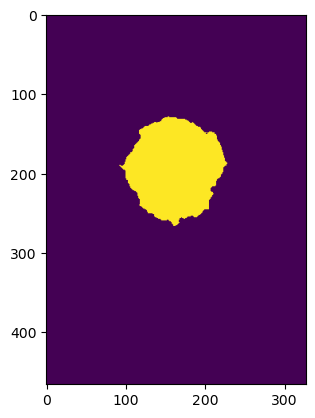

In [138]:
plt.imshow(before > 2000)

### Views vs. Copies
**Slice indexing returns a view** of the original array that points to the same location in memory. Meaning operations on the slice affect the original array.

In [139]:
a

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [140]:
b = a[:3, :3]
b[1, 1] = 10

In [141]:
a

array([[ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1]])

**Array and Boolean indexing returns a copy** of the original array (with a different memory address). Operations on the copy do not affect the original array.

In [142]:
c = a[range(3), range(3)]
c

array([ 1, 10,  1])

In [143]:
c[1] = 20
c

array([ 1, 20,  1])

In [144]:
a

array([[ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1]])

## Reshaping and Stacking Arrays

Reshaping of arrays is easy to do with the np.reshape function.  The function works by taking an array and desired shape, and then returning a new array with that shape.  Note, however, that the requested shape must be consistent with the array that is passed in.  The syntax is:

    np.reshape(a, (newshape))

Arrays also have a reshape method, which means you can use the following form:

    a.reshape( (newshape) )
    
Example follows.

In [145]:
a = np.arange(100)
print('a: ', a)
b = np.reshape(a, (10,10))
print('b: ', b)

a:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
b:  [[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]


## hstack and vstack

hstack and vstack can be used to add columns to an array or rows to an array.

In [146]:
#vstack example -- add a row to an array
a = np.zeros((3, 3), dtype=float)
print(a)
b = np.vstack((a, np.array([2, 2, 2])))
print(b)
print('The shape of b is ', b.shape)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [2. 2. 2.]]
The shape of b is  (4, 3)


In [147]:
#hstack example -- add a column to an array
a = np.zeros((3, 3), dtype=float)
print(a)
b = np.hstack((a, np.array([[2], [2], [2]])))
print(b)
print('The shape of b is ', b.shape)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0. 2.]
 [0. 0. 0. 2.]
 [0. 0. 0. 2.]]
The shape of b is  (3, 4)


## Flattening arrays
oftentimes we need to flatten a 2D array to one dimension
the `ndarray.flat` attribute provides a means of iterating over a numpy array in one-dimension

In [148]:
[value for value in b.flat]

[np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(2.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(2.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(2.0)]

if we need a 1D copy returned instead, we can use the `ndarray.flatten` method

In [149]:
b.flatten()

array([0., 0., 0., 2., 0., 0., 0., 2., 0., 0., 0., 2.])

`.ravel()` returns a view instead of a copy when possible

In [150]:
c = b.ravel()
c[1] = 4
b

array([[0., 4., 0., 2.],
       [0., 0., 0., 2.],
       [0., 0., 0., 2.]])

In [151]:
c

array([0., 4., 0., 2., 0., 0., 0., 2., 0., 0., 0., 2.])

## Testing your Skills

1. Can you create a two-dimensional checkerboard array of 1's and 0's?  Can you do it with a single line of python code?
2. In an earlier exercise, you made x and y using the following lines of code.  Now use vstack to add another row to y that has the cosing of x.  Then plot them both on the same figure.

    x = np.linspace(0, 2*np.pi)
    
    y = np.sin(x)

##### one way to do it

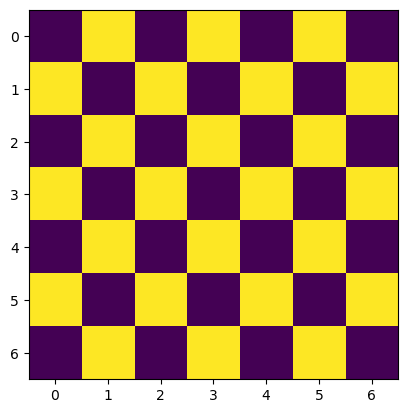

In [152]:
size = 6
plt.imshow(np.array((([0, 1]*(size-2))[:-1], # first row
                     ([0, 1]*(size-2))[1:]) *  # second row (staggered)
                    (size-2))[:-1]) # repeat first and second row

In [153]:
cboard = np.zeros((size, size))
cboard[::2, ::2] = 1
cboard

array([[1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [154]:
#Skill Test 1 -- checkerboard

In [155]:
#Skill Test 2 -- vstack
x = np.linspace(0, 2*np.pi)
y = np.sin(x)

## Masking an Array

Masking is the process of performing array operations on a specific set of cells, called a mask.  A mask is a logical array with the same shape as the array it is applied to.  Here is an example.

In [156]:
#create a 10 by 10 array
a = np.arange(100).reshape((10,10))
print('a:\n', a)

a:
 [[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]


In [157]:
print('mask array for a == 1:\n', a[:, :] == 1)

mask array for a == 1:
 [[False  True False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]]


In [158]:
# We can create a mask array as follows
# enclosing the conditional statement in parentheses is added for clarity
mask = (a[:,:]==1)
print(mask)

#Now we can use the mask to set values
a[mask] = 100
print(a)

[[False  True False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]]
[[  0 100   2   3   4   5   6   7   8   9]
 [ 10  11  12  13  14  15  16  17  18  19]
 [ 20  21  22  23  24  25  26  27  28  29]
 [ 30  31  32  33  34  35  36  37  38  39]
 [ 40  41  42  43  44  45  46  47  48  49]
 [ 50  51  52  53  54  55  56  57  58  59]
 [ 60  61  62  63  64  65  66  67  68  69]
 [ 70  71  72  73  74  75  76  77  78  79]
 [ 80  81  82  83  84  85

## Numpy Where Function

The numpy `where` function can be used in one of two ways.  The first way is to return array indices for array elements that meet a condition.  When used in this form, the syntax is:

    where(condition)

The result is a tuple of size array.ndim, that has an indices for each dimension.

The `where` function can also be used with the following form:

    where(condition, [x, y])
    
In this case, the where function returns an array that has the value of x where the condition is true and the value of y where the condition is false.

In [159]:
#create an array
a = np.arange(100).reshape((10,10))

#use where with the first form in which only a condition is specified
result = np.where(a >90)
print('result: ', result)

#now we can use this result tuple for array assignments
a[result] = -999
print('a: ', a)

result:  (array([9, 9, 9, 9, 9, 9, 9, 9, 9]), array([1, 2, 3, 4, 5, 6, 7, 8, 9]))
a:  [[   0    1    2    3    4    5    6    7    8    9]
 [  10   11   12   13   14   15   16   17   18   19]
 [  20   21   22   23   24   25   26   27   28   29]
 [  30   31   32   33   34   35   36   37   38   39]
 [  40   41   42   43   44   45   46   47   48   49]
 [  50   51   52   53   54   55   56   57   58   59]
 [  60   61   62   63   64   65   66   67   68   69]
 [  70   71   72   73   74   75   76   77   78   79]
 [  80   81   82   83   84   85   86   87   88   89]
 [  90 -999 -999 -999 -999 -999 -999 -999 -999 -999]]


In [160]:
#use where with condition and 'x' and 'y'
#let's change all those -999's to -998
np.where(a == -999, a + 1, a)

array([[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9],
       [  10,   11,   12,   13,   14,   15,   16,   17,   18,   19],
       [  20,   21,   22,   23,   24,   25,   26,   27,   28,   29],
       [  30,   31,   32,   33,   34,   35,   36,   37,   38,   39],
       [  40,   41,   42,   43,   44,   45,   46,   47,   48,   49],
       [  50,   51,   52,   53,   54,   55,   56,   57,   58,   59],
       [  60,   61,   62,   63,   64,   65,   66,   67,   68,   69],
       [  70,   71,   72,   73,   74,   75,   76,   77,   78,   79],
       [  80,   81,   82,   83,   84,   85,   86,   87,   88,   89],
       [  90, -998, -998, -998, -998, -998, -998, -998, -998, -998]])

## Testing your Skills

1. Experiment with the mask and where functionality in numpy.  Create an array of shape (100, 100) that has random values between 0 and 1000.  Then replace all values less than 250 with np.nan and all values greater than 750 with np.nan.  Then plot it.

In [161]:
# Test your skills!

## Comparing arrays
element-wise:

In [162]:
a == c

ValueError: operands could not be broadcast together with shapes (10,10) (12,) 

determining if two arrays have the same shape and elements

In [163]:
np.array_equal(a, c), np.array_equal(b, c)

(False, False)

### Logical operations

In [164]:
np.any(a == c), np.all(a == c)

ValueError: operands could not be broadcast together with shapes (10,10) (12,) 

**Note:** `any` and `all` are included in the standard library too

In [165]:
any((True, False)), all((True, False))

(True, False)